In [1]:
import numpy as np
import pandas as pd

In [47]:
cuit = pd.read_csv('/content/data_set.csv')
cuit

,tweet,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Pemimpin Berkwalitas , Amanah, Bersahaja, Bera...",NaN,NaN,Positif
1,Coba tebak siapa anak yang dekat Pak Anies yan...,NaN,NaN,Netral
2,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING 1.00...,NaN,NaN,positif
3,Olahraga pak Anies sangat Simpel gak pakai Sel...,NaN,NaN,positif
4,"MESTI DI TIRU, CAWE CAWE DARI RAKYAT UNTUK MEM...",NaN,NaN,positif
...,...,...,...,...
1004,"Rest In Peace \nPartai @Nasdem, pengusung @ani...",NaN,NaN,negatif
1005,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,NaN,NaN,negatif
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,NaN,NaN,netral
1007,@kangdede78 @aniesbaswedan Mna yg ngibul kakek...,NaN,NaN,netral


In [48]:
cuit.drop(cuit.iloc[:, 1:3],inplace=True, axis=1)
cuit.columns = ['cuitan','kelas']
cuit

,cuitan,kelas
0,"Pemimpin Berkwalitas , Amanah, Bersahaja, Bera...",Positif
1,Coba tebak siapa anak yang dekat Pak Anies yan...,Netral
2,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING 1.00...,positif
3,Olahraga pak Anies sangat Simpel gak pakai Sel...,positif
4,"MESTI DI TIRU, CAWE CAWE DARI RAKYAT UNTUK MEM...",positif
...,...,...
1004,"Rest In Peace \nPartai @Nasdem, pengusung @ani...",negatif
1005,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,negatif
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral
1007,@kangdede78 @aniesbaswedan Mna yg ngibul kakek...,netral


In [49]:
import re
def cleaningcuit(cuit):
  cuit = re.sub(r'@[A-Za-a0-9]+',' ',cuit)
  cuit = re.sub(r'#[A-Za-z0-9]+',' ',cuit)
  cuit = re.sub(r"http\S+",' ',cuit)
  cuit = re.sub(r'[0-9]+',' ',cuit)
  cuit = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", cuit)
  cuit = cuit.strip(' ')
  return cuit
cuit['Cleaning']= cuit['cuitan'].apply(cleaningcuit)

def clearEmoji(cuit):
    return cuit.encode('ascii', 'ignore').decode('ascii')
cuit['HapusEmoji']= cuit['Cleaning'].apply(clearEmoji)

def replaceTOM(cuit):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', cuit)
cuit['3/Lebih']= cuit['HapusEmoji'].apply(replaceTOM)

def casefoldingText(cuit):
  cuit = cuit.lower()
  return cuit
cuit['CaseFolding']= cuit['3/Lebih'].apply(casefoldingText)

In [50]:
cuit

,cuitan,kelas,Cleaning,HapusEmoji,3/Lebih,CaseFolding
0,"Pemimpin Berkwalitas , Amanah, Bersahaja, Bera...",Positif,Pemimpin Berkwalitas Amanah Bersahaja Bera...,Pemimpin Berkwalitas Amanah Bersahaja Bera...,Pemimpin Berkwalitas Amanah Bersahaja Berada...,pemimpin berkwalitas amanah bersahaja berada...
1,Coba tebak siapa anak yang dekat Pak Anies yan...,Netral,Coba tebak siapa anak yang dekat Pak Anies yan...,Coba tebak siapa anak yang dekat Pak Anies yan...,Coba tebak siapa anak yang dekat Pak Anies yan...,coba tebak siapa anak yang dekat pak anies yan...
2,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING 1.00...,positif,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING ...,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING ...,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING POSK...,jarnas anies beraksi jawa timur launching posk...
3,Olahraga pak Anies sangat Simpel gak pakai Sel...,positif,Olahraga pak Anies sangat Simpel gak pakai Sel...,Olahraga pak Anies sangat Simpel gak pakai Sel...,Olahraga pak Anies sangat Simpel gak pakai Sel...,olahraga pak anies sangat simpel gak pakai sel...
4,"MESTI DI TIRU, CAWE CAWE DARI RAKYAT UNTUK MEM...",positif,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,mesti di tiru cawe cawe dari rakyat untuk mem...
...,...,...,...,...,...,...
1004,"Rest In Peace \nPartai @Nasdem, pengusung @ani...",negatif,Rest In Peace \nPartai sdem pengusung niesb...,Rest In Peace \nPartai sdem pengusung niesb...,Rest In Peace \nPartai sdem pengusung niesb...,rest in peace \npartai sdem pengusung niesb...
1005,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,negatif,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,ngakunya jawa tulen tapi gak bisa bedain antar...
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,oktertifa niesbaswedan semoga pak anies memil...
1007,@kangdede78 @aniesbaswedan Mna yg ngibul kakek...,netral,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan mna yg ngibul kakek dede


In [55]:
cuit['kelas'].unique()

array(['Positif', 'Netral', 'positif', 'netral', 'negatif'], dtype=object)

In [59]:
cuit['kelas']=cuit['kelas'].apply(casefoldingText)

In [69]:
cuit['kelas'].unique()

array(['positif', 'netral', 'negatif'], dtype=object)

In [70]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
cuit['target']= label_encoder.fit_transform(cuit['kelas'])
cuit

,cuitan,kelas,Cleaning,HapusEmoji,3/Lebih,CaseFolding,Kelas,target
0,"Pemimpin Berkwalitas , Amanah, Bersahaja, Bera...",positif,Pemimpin Berkwalitas Amanah Bersahaja Bera...,Pemimpin Berkwalitas Amanah Bersahaja Bera...,Pemimpin Berkwalitas Amanah Bersahaja Berada...,pemimpin berkwalitas amanah bersahaja berada...,positif,2
1,Coba tebak siapa anak yang dekat Pak Anies yan...,netral,Coba tebak siapa anak yang dekat Pak Anies yan...,Coba tebak siapa anak yang dekat Pak Anies yan...,Coba tebak siapa anak yang dekat Pak Anies yan...,coba tebak siapa anak yang dekat pak anies yan...,netral,1
2,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING 1.00...,positif,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING ...,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING ...,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING POSK...,jarnas anies beraksi jawa timur launching posk...,positif,2
3,Olahraga pak Anies sangat Simpel gak pakai Sel...,positif,Olahraga pak Anies sangat Simpel gak pakai Sel...,Olahraga pak Anies sangat Simpel gak pakai Sel...,Olahraga pak Anies sangat Simpel gak pakai Sel...,olahraga pak anies sangat simpel gak pakai sel...,positif,2
4,"MESTI DI TIRU, CAWE CAWE DARI RAKYAT UNTUK MEM...",positif,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,MESTI DI TIRU CAWE CAWE DARI RAKYAT UNTUK MEM...,mesti di tiru cawe cawe dari rakyat untuk mem...,positif,2
...,...,...,...,...,...,...,...,...
1004,"Rest In Peace \nPartai @Nasdem, pengusung @ani...",negatif,Rest In Peace \nPartai sdem pengusung niesb...,Rest In Peace \nPartai sdem pengusung niesb...,Rest In Peace \nPartai sdem pengusung niesb...,rest in peace \npartai sdem pengusung niesb...,negatif,0
1005,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,negatif,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,ngakunya jawa tulen tapi gak bisa bedain antar...,negatif,0
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,oktertifa niesbaswedan semoga pak anies memil...,netral,1
1007,@kangdede78 @aniesbaswedan Mna yg ngibul kakek...,netral,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan Mna yg ngibul kakek dede,kangdede niesbaswedan mna yg ngibul kakek dede,netral,1


<Axes: ylabel='kelas'>

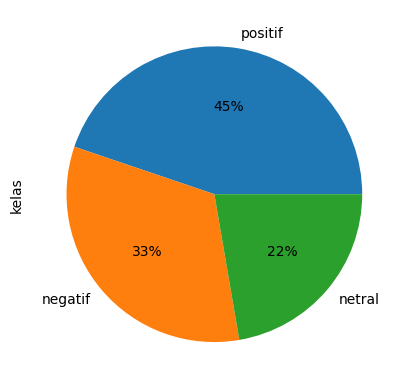

In [62]:
cuit.kelas.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [64]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [66]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

feature extraction

In [67]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
indo = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = CountVectorizer(max_df=0.90, max_features=1000, stop_words=indo)
tfidf = tfidf_vectorizer.fit_transform(cuit['CaseFolding'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


model

https://github.com/debbydbrh/Sentiment-Analysis-Twitter-Using-Support-Vector-Machine/blob/main/Sentiment%20Analysis%20using%20Support%20Vector%20Machine.ipynb


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf, cuit['target'], test_size=0.2, random_state=0)

In [79]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

prediction = svc.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
F1_Score = f1_score(y_test, prediction_int, average='micro') #menghitung f1-score
print('Precision score: ', precision_score(y_test, prediction_int, average='micro')) #menghitung precision score
print('Accuracy Score: ', accuracy_score(y_test, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Precision score:  0.33663366336633666
Accuracy Score:  0.33663366336633666
F1_Score: 0.33663366336633666


evaluasi

In [87]:
MODEL_ID = []
Accuracy = []
LOG_CV_ERR = []
F1Score = []
def calculate_log_cv_error(logmodel,X_train,y_train):
    ms_errors= cross_val_score(logmodel, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [110]:
def evaluate_model(logmodel,X_train,X_test,y_train,y_test,predictions):
    log_cv_error = calculate_log_cv_error(logmodel,X_train,y_train)
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
    print (f'\nAccuracy Score:  {accuracy_score(y_test,predictions)}')
    print("Cross Validation Error: ",log_cv_error)
    # logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test), multi_class='ovo',average='micro')
    # fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
    # LOG_CV_ERR.append(log_cv_error)
    # plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    # plt.plot([0, 1], [0, 1],'r--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic')
    # plt.legend(loc="lower right")
    # plt.show()

In [113]:
evaluate_model(svc,X_train,X_test,y_train,y_test,prediction_int)
MODEL_ID.append('Support Vector Classifier')
Accuracy.append(accuracy_score(y_test, prediction_int))
F1Score.append(f1_score(y_test, prediction_int, average='micro', labels=np.unique(prediction_int)))


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.86      0.47        64
           1       0.39      0.25      0.30        53
           2       0.00      0.00      0.00        85

    accuracy                           0.34       202
   macro avg       0.24      0.37      0.26       202
weighted avg       0.21      0.34      0.23       202



Confusion Matrix:
[[55  9  0]
 [40 13  0]
 [74 11  0]]


Accuracy Score:  0.33663366336633666
Cross Validation Error:  0.9983787250285345
